<a href="https://colab.research.google.com/github/SpeedKillsx/TPs-Traitement-et-Analyse-D-images/blob/main/TP2_TAI_Histogramme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP2 TAI : Histogramme
Réalisé par :
* LABCHRI Amayas
* KOULAL Yidhir Aghiles
* BAROUD Yasmine
* ABCI Fatima



#Importation des librairies 

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Lecture du fichier csv

In [ ]:
image = np.genfromtxt('/content/drive/MyDrive/TAI_ressources/TP2/image.csv', delimiter=';')

In [ ]:
image

array([[ 52.,  55.,  61.,  59.,  79.,  61.,  76.,  61.],
       [ 62.,  59.,  55., 104.,  94.,  85.,  59.,  71.],
       [ 63.,  65.,  66., 113., 144., 104.,  63.,  72.],
       [ 64.,  70.,  70., 126., 154., 109.,  71.,  69.],
       [ 67.,  73.,  68., 106., 122.,  88.,  68.,  68.],
       [ 68.,  79.,  60.,  70.,  77.,  66.,  58.,  75.],
       [ 69.,  85.,  64.,  58.,  55.,  61.,  65.,  83.],
       [ 70.,  87.,  69.,  68.,  65.,  73.,  78.,  90.]])

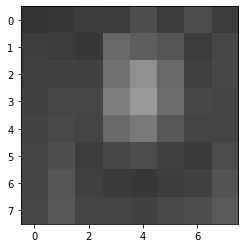

In [ ]:
plt.imshow(image, cmap = 'gray', vmin=0, vmax = 255)# affichage de l'image codé sur 8 niveaux de gris

In [ ]:
image.shape

(8, 8)

#Luminance d'une image

In [ ]:
#calcule de la somme des pixels divisé sur le nombre de pixels de l'image 
sum = 0
for i in range(8):
  for j in range(8):
    sum = sum + image[i][j]
luminance = sum/image.size

In [ ]:
luminance

76.078125

#Calculer la dynamique d'une image

In [ ]:
Lmax  = np.max(image) # la valeur max dans l'image
Lmin = np.min(image) # la valeur min dans l'image

In [ ]:
print("L'intervale [Lmin,Lmax] = [{},{}]".format(Lmin,Lmax))

L'intervale [Lmin,Lmax] = [52.0,154.0]


#Calculer la contraste d'une image

In [ ]:
contraste = (Lmax-Lmin)/(Lmax+Lmin) # application de la formule

In [ ]:
Lmin, Lmax, contraste

(52.0, 154.0, 0.49514563106796117)

In [ ]:
print("La contraste = ",contraste)

La contraste =  0.49514563106796117


#Calculer l'ecart type d'une image en niveau de gris

In [ ]:
from math import sqrt
var = 0

for  i in range(0,image.shape[0]):
  for j in range(0,image.shape[1]):
    var = var + (image[i][j] -luminance)**2
    
ecart_type = np.sqrt(var/(image.size))

In [ ]:
ecart_type

20.916728269124093

#Histogramme de l'image

In [ ]:
hist =np.zeros(shape=256)# creation d'un tableau pour l'histogramme de taille 256
ng = np.zeros(shape=256) # pour les niveau de gris

In [ ]:
# Occurence de chaque pixel
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    hist[int(image[i][j])] +=1
i = 0
# Niveau de gris
for i in range(0,256):
  ng[i] =i


Text(0, 0.5, 'le nombre de pixel ')

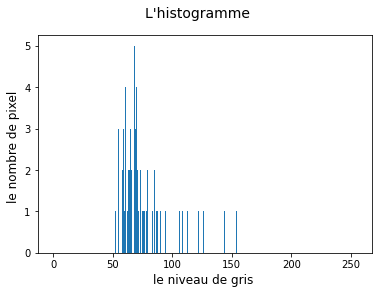

In [ ]:
plt.bar(ng,hist)
plt.suptitle("L'histogramme ", fontsize = 14)
plt.xlabel("le niveau de gris ", fontsize = 12)
plt.ylabel("le nombre de pixel ", fontsize =12)

#Histogrmme normalisé

In [ ]:
hn = np.zeros(hist.size)

In [ ]:
for i in range(hist.size): # diviser la valeur de histogramme sur la taille de l'image
  hn[i] = hist[i]/image.size

Text(0, 0.5, 'le nombre de pixel ')

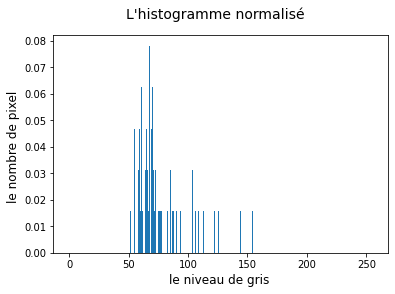

In [ ]:
plt.bar(ng, hn)
plt.suptitle("L'histogramme normalisé", fontsize = 14)
plt.xlabel("le niveau de gris ", fontsize = 12)
plt.ylabel("le nombre de pixel ", fontsize =12)

#Histogramme cumulé

In [ ]:
i = 1
C = np.zeros(256)
C[0] = hist[0]
for i in range(1,255):
  C[i] =C[i-1] + hist[i]

Text(0, 0.5, 'le nombre de pixel ')

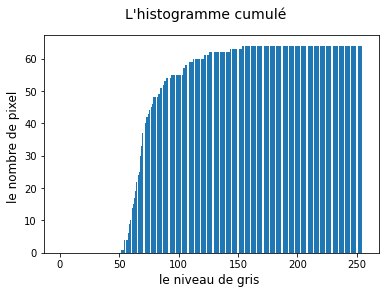

In [ ]:
plt.bar(ng, C)
plt.suptitle("L'histogramme cumulé", fontsize = 14)
plt.xlabel("le niveau de gris ", fontsize = 12)
plt.ylabel("le nombre de pixel ", fontsize =12)

#Histogramme cumulé normalisé

In [ ]:
Cn = np.zeros(256)

In [ ]:
for i in range(C.size):
  Cn[i] = C[i]/image.size 

Text(0, 0.5, 'le nombre de pixel ')

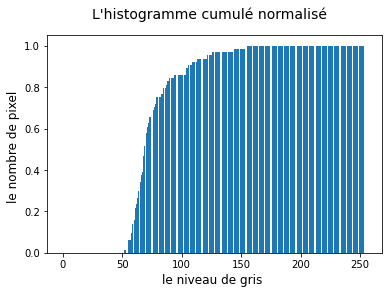

In [ ]:
plt.bar(ng, Cn)
plt.suptitle("L'histogramme cumulé normalisé", fontsize = 14)
plt.xlabel("le niveau de gris ", fontsize = 12)
plt.ylabel("le nombre de pixel ", fontsize =12)

#Comparaison avec les fonctions de opencv

In [ ]:
img = np.float32(image)
histCv = cv.calcHist([img],[0],None,[256],[0,256])

Text(0.5, 1.0, 'Histogramme')

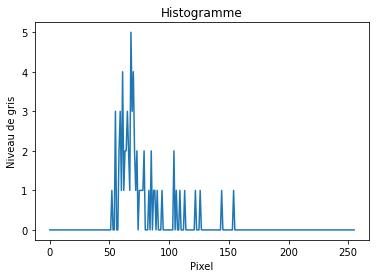

In [ ]:
plt.plot(histCv)
plt.xlabel("Pixel")
plt.ylabel("Niveau de gris")
plt.title("Histogramme")

#7. Etendre l'histogramme

In [ ]:
def ExapndHist(image): # fonction pour l'expansion de l'image
  expand = np.zeros(image.shape)
  cons = 0
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      expand[i][j] =  (((image[i][j] - Lmin))*255)/ (Lmax - Lmin)
      
  return expand


In [ ]:
ExapndHist(image)

array([[  0. ,   7.5,  22.5,  17.5,  67.5,  22.5,  60. ,  22.5],
       [ 25. ,  17.5,   7.5, 130. , 105. ,  82.5,  17.5,  47.5],
       [ 27.5,  32.5,  35. , 152.5, 230. , 130. ,  27.5,  50. ],
       [ 30. ,  45. ,  45. , 185. , 255. , 142.5,  47.5,  42.5],
       [ 37.5,  52.5,  40. , 135. , 175. ,  90. ,  40. ,  40. ],
       [ 40. ,  67.5,  20. ,  45. ,  62.5,  35. ,  15. ,  57.5],
       [ 42.5,  82.5,  30. ,  15. ,   7.5,  22.5,  32.5,  77.5],
       [ 45. ,  87.5,  42.5,  40. ,  32.5,  52.5,  65. ,  95. ]])

In [ ]:
np.max(ExapndHist(image))

255.0

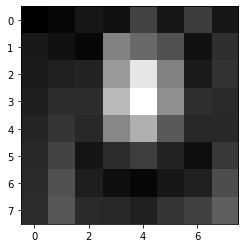

In [ ]:
plt.imshow(ExapndHist(image), cmap = "gray")

In [ ]:
hist_etr = np.zeros(256)
ng_etr = np.zeros(256)
expand = ExapndHist(image) 
for i in range(expand.shape[0]): # boucle pour calculer l'histogramme de l'image
  for j in range(expand.shape[1]):
    hist_etr[int(expand[i][j])] +=1
i = 0
# Niveau de gris
for i in range(256):
  ng_etr [i] =i

<BarContainer object of 256 artists>

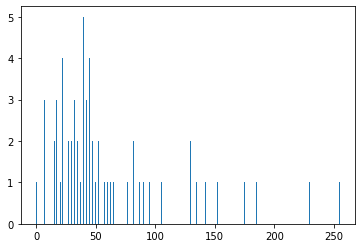

In [ ]:
plt.bar(ng_etr, hist_etr)

#Comparaison des deux images

Text(0.5, 1.0, 'Histogramme Etendu')

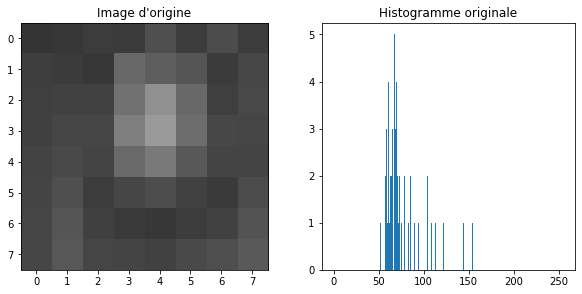

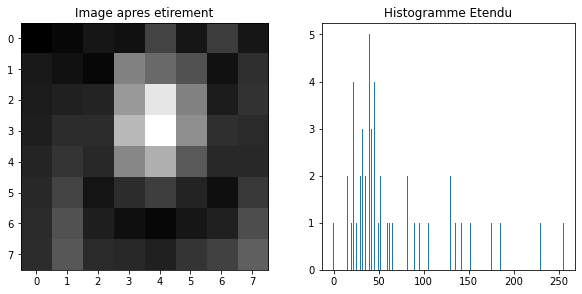

In [ ]:
plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image, cmap="gray", vmin = 0, vmax = 255)
plt.title("Image d'origine")
plt.subplot(2,2,2)
plt.bar(ng, hist)
plt.title("Histogramme originale")
plt.figure(2, figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(expand, cmap="gray")
plt.title("Image apres etirement")
plt.subplot(2,2,2)
plt.bar(ng_etr, hist_etr, width = 0.9)
plt.title("Histogramme Etendu")

#Egalisation de l'histogramme

In [ ]:
def EgalisationImage(image):
  imageEq = np.zeros(shape=image.shape) # création d'une matrice 8x8 de 0
  image1 = np.float32(image)
  hh = cv.calcHist([image1], [0], None, [256], [0, 255]) # calculer l'histogramme de l'image avec la fonction calcHist
  
  cc = np.zeros(256) # tableau pour cumulé de l'image
  ccn = np.zeros(256)# cumulé normalisé de l'image
  cc[0] = hh[0]
  for i in range(256):
    cc[i] = cc[i-1] + hh[i]
  for i in range(256):
    ccn[i] = cc[i]/ image.size
  
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      imageEq[i][j] = ccn[int(image[i][j])] *255
  return imageEq

In [ ]:
imageEgaliser = EgalisationImage(image)

In [ ]:
imm = np.round(imageEgaliser)

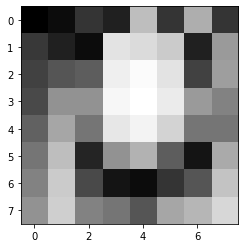

In [ ]:
plt.imshow(imageEgaliser, cmap="gray")

In [ ]:
def HistEq(image): # calculer l'histogramme de l'image egalisé
  histEq = np.zeros(256)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      histEq[int(image[i][j])] +=1
  return histEq

In [ ]:
h  = HistEq(imageEgaliser)

<BarContainer object of 256 artists>

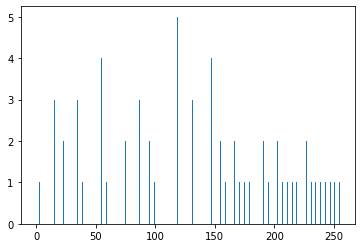

In [ ]:
plt.bar(ng, h)

Text(0.5, 1.0, 'Histogramme egaliser')

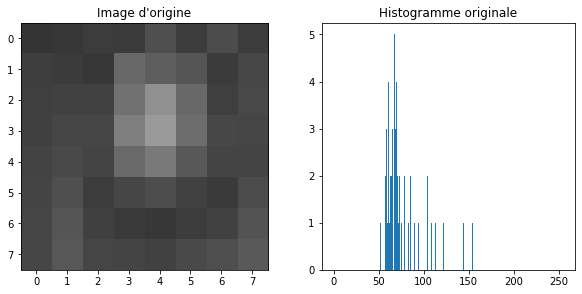

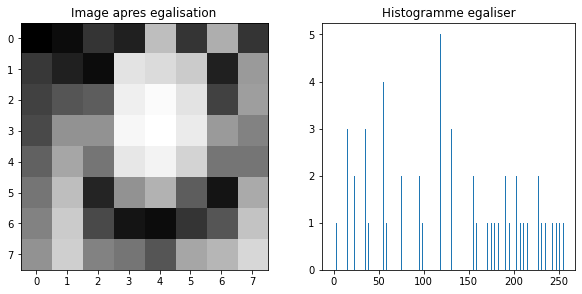

In [ ]:
plt.figure(1, figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image, cmap="gray", vmin = 0, vmax = 255)
plt.title("Image d'origine")
plt.subplot(2,2,2)
plt.bar(ng, hist)
plt.title("Histogramme originale")
plt.figure(2, figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(imageEgaliser, cmap="gray")
plt.title("Image apres egalisation")
plt.subplot(2,2,2)
plt.bar(ng_etr, h, width = 0.9)
plt.title("Histogramme egaliser")

#9. Amellioration de la contraste

In [ ]:
fig1 = cv.imread("/content/drive/MyDrive/TAI_ressources/TP2/Fig0208(a).tif",0)
fig2 = cv.imread("/content/drive/MyDrive/TAI_ressources/TP2/Fig0210(a).tif",0)
fig3 = cv.imread("/content/drive/MyDrive/TAI_ressources/TP2/Fig0228(a).tif",0)

In [ ]:
fig1_contraste = ExapndHist(fig1)
fig2_contraste = ExapndHist(fig2)
fig3_contraste = ExapndHist(fig3)

Text(0.5, 1.0, "Contraste d'origine")

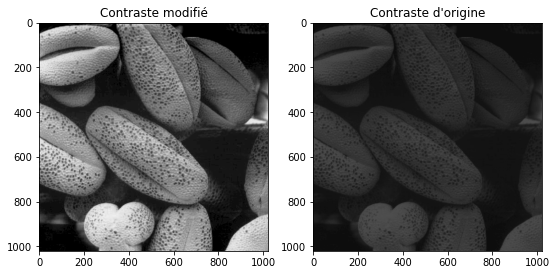

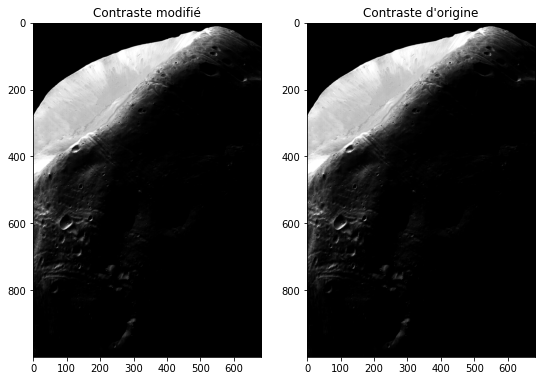

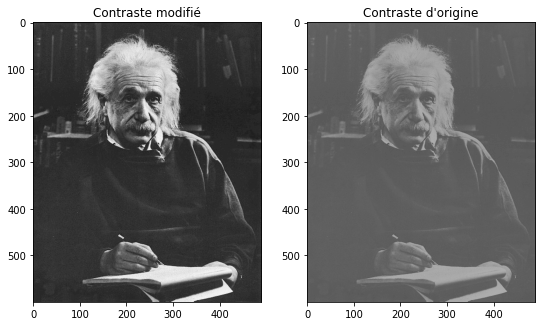

In [ ]:
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.imshow(fig1_contraste, cmap="gray")
plt.title("Contraste modifié")
plt.subplot(1,2,2)
plt.imshow(fig1, cmap="gray", vmin=0, vmax = 255)
plt.title("Contraste d'origine")
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.imshow(fig2_contraste, cmap="gray")
plt.title("Contraste modifié")
plt.subplot(1,2,2)
plt.imshow(fig2, cmap="gray", vmin=0, vmax = 255)
plt.title("Contraste d'origine")
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.imshow(fig3_contraste, cmap="gray")
plt.title("Contraste modifié")
plt.subplot(1,2,2)
plt.imshow(fig3, cmap="gray", vmin=0, vmax = 255)
plt.title("Contraste d'origine")

Text(0.5, 1.0, "Contraste d'origine")

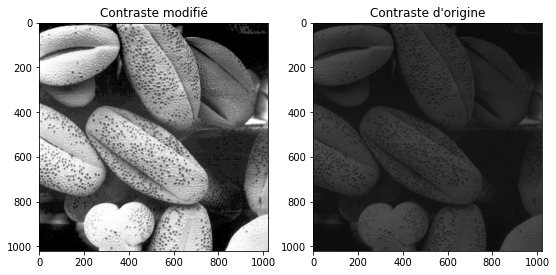

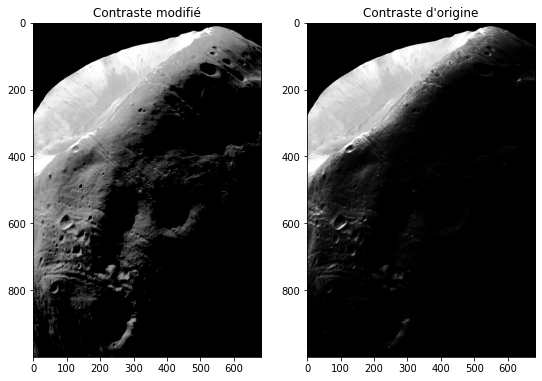

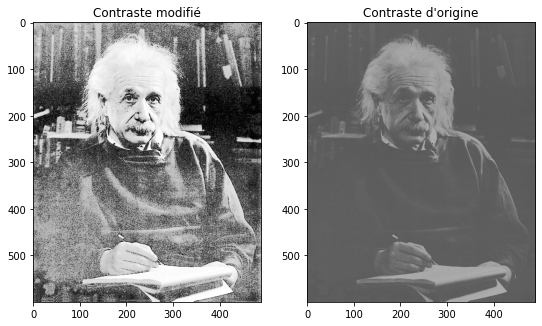

In [ ]:
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.imshow(EgalisationImage(fig1), cmap="gray")
plt.title("Contraste modifié")
plt.subplot(1,2,2)
plt.imshow(fig1, cmap="gray", vmin=0, vmax = 255)
plt.title("Contraste d'origine")
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.imshow(EgalisationImage(fig2), cmap="gray")
plt.title("Contraste modifié")
plt.subplot(1,2,2)
plt.imshow(fig2, cmap="gray", vmin=0, vmax = 255)
plt.title("Contraste d'origine")
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.imshow(EgalisationImage(fig3), cmap="gray")
plt.title("Contraste modifié")
plt.subplot(1,2,2)
plt.imshow(fig3, cmap="gray", vmin=0, vmax = 255)
plt.title("Contraste d'origine")

TP : FILTRE


In [ ]:
img = np.empty(shape=(8,8),dtype=np.uint8)
img[0][0] = 0 ;
img[0][1] = 12 ;
img[0][2] = 53 ;
img[0][3] = 32 ;
img[0][4] = 190 ;
img[0][5] = 53 ;
img[0][6] = 174 ;
img[0][7] = 53 ;
img[1][0] = 57 ;
img[1][1] = 32 ;
img[1][2] = 12 ;
img[1][3] = 227 ;
img[1][4] = 219 ;
img[1][5] = 202 ;
img[1][6] = 32 ;
img[1][7] = 154;
img[2][0] = 65 ;
img[2][1] = 85 ;
img[2][2] = 93 ;
img[2][3] = 239 ;
img[2][4] = 251 ;
img[2][5] = 227 ;
img[2][6] = 65 ;
img[2][7] = 158 ;
img[3][0] = 73 ;
img[3][1] = 146 ;
img[3][2] = 146 ;
img[3][3] = 247 ;
img[3][4] = 255 ;
img[3][5] = 235 ;
img[3][6] = 154 ;
img[3][7] = 130 ;
img[4][0] = 97 ;
img[4][1] = 166 ;
img[4][2] = 117 ;
img[4][3] = 231 ;
img[4][4] = 243 ;
img[4][5] = 210 ;
img[4][6] = 117 ;
img[4][7] = 117 ;
img[5][0] = 117 ;
img[5][1] = 190 ;
img[5][2] = 36 ;
img[5][3] = 146 ;
img[5][4] = 178 ;
img[5][5] = 93 ;
img[5][6] = 20 ;
img[5][7] = 170 ;
img[6][0] = 130 ;
img[6][1] = 202 ;
img[6][2] = 73 ;
img[6][3] = 20 ;
img[6][4] = 12 ;
img[6][5] = 53 ;
img[6][6] = 85 ;
img[6][7] = 194 ;
img[7][0] = 146 ;
img[7][1] = 206 ;
img[7][2] = 117 ;
img[7][4] = 85 ;
img[7][5] = 166 ;
img[7][6] = 182 ;
img[7][7] = 215 ;

In [ ]:
def padding (image,value,reference_shape):
  return np.pad(image, reference_shape, mode='constant',constant_values=value)

In [ ]:
def gradient_X(image):
  image_pad = padding(img, 0, [0,1]) # ajouter le pading à l'image (img)
  image_gradientX = np.zeros(image.shape)

  for i in range(image_pad.shape[0] - 1):
   for j in range (image_pad.shape[1] - 1):
     image_gradientX[i][j] = int(image_pad[i+1,j]) - int(image_pad[i][j])
  return image_gradientX


In [ ]:
def gradient_Y(image):
  image_pad = padding(img, 0, [0,1])
  image_gradientY = np.zeros(image_pad.shape)

  for i in range(image_pad.shape[0] - 1):
    for j in range(image_pad.shape[1] -1):
      image_gradientY[i][j] = int(image_pad[i, j+1])-int(image_pad[i][j])
  return image_gradientY

In [ ]:
GradX= gradient_X(img)
GradY = gradient_Y(img)

In [ ]:
print(GradX,"\n\n\n", GradY)

[[  57.   20.  -41.  195.   29.  149. -142.  101.]
 [   8.   53.   81.   12.   32.   25.   33.    4.]
 [   8.   61.   53.    8.    4.    8.   89.  -28.]
 [  24.   20.  -29.  -16.  -12.  -25.  -37.  -13.]
 [  20.   24.  -81.  -85.  -65. -117.  -97.   53.]
 [  13.   12.   37. -126. -166.  -40.   65.   24.]
 [  16.    4.   44.  -20.   73.  113.   97.   21.]
 [-146. -206. -117.    0.  -85. -166. -182. -215.]] 


 [[  12.   41.  -21.  158. -137.  121. -121.  -53.    0.]
 [ -25.  -20.  215.   -8.  -17. -170.  122. -154.    0.]
 [  20.    8.  146.   12.  -24. -162.   93. -158.    0.]
 [  73.    0.  101.    8.  -20.  -81.  -24. -130.    0.]
 [  69.  -49.  114.   12.  -33.  -93.    0. -117.    0.]
 [  73. -154.  110.   32.  -85.  -73.  150. -170.    0.]
 [  72. -129.  -53.   -8.   41.   32.  109. -194.    0.]
 [  60.  -89. -117.   85.   81.   16.   33. -215.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.]]


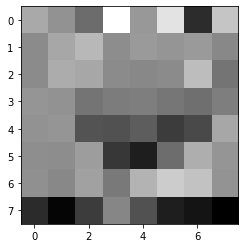

In [ ]:
plt.imshow(GradX, cmap="gray")

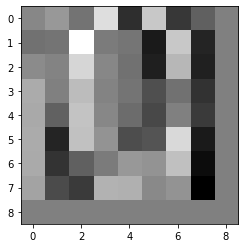

In [ ]:
plt.imshow(GradY, cmap="gray")

#mangetude


In [ ]:
def MOD(X, Y):
  matMod = np.zeros(shape=(8, 8))
  for i in range(8):
    for j in range(8):
      c = (X[i][j])**2 + (Y[i][j])**2
      matMod[i, j] = sqrt( c)
  return matMod 

In [ ]:
mod = MOD(GradX, GradY)

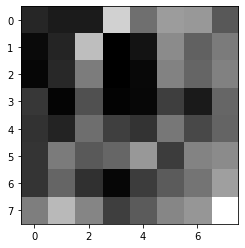

In [ ]:
plt.imshow(mod, cmap="gray")

#Binarisation

In [ ]:
def Binarisation(matrice):
  matBinaire = np.zeros(shape=(8,8))
  for i in range(matrice.shape[0]):
    for j in range(matrice.shape[1]):
      if matrice[i,j]>= 70:
        matBinaire[i,j] = 1
      else:
        matBinaire[i,j] = 0
  return matBinaire

In [ ]:
Bin = Binarisation(mod)

In [ ]:
Bin

array([[0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

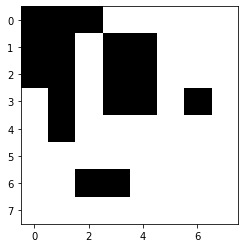

In [ ]:
plt.imshow(Bin, cmap="gray")

#dilatation


In [ ]:
def Dilatation(matrice):
  for i in range(8):
    for j in range(8):
      if (i>1 and i < 7):
        if (j>0 and j < 7):
          matrice[i,j-1] = 1 
          matrice[i-1,j] = 1 
          matrice[i+1,j+1] = 1
          matrice[i,j] = 1
          matrice[i-1,j-1] = 1
        
      
  return matrice

In [ ]:
Dilatation(Bin)

array([[0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
def DilatationCarre(matrice):
  for i in range(8-1):
    for j in range(8-1):
      if i >0 and i<7:
        if j >=0 and i <7:
          matrice[i,j-1] = 1 
          matrice[i-1,j] = 1 
          matrice[i+1,j+1] = 1
          matrice[i,j] = 1
          matrice[i-1,j-1] = 1
        
      
  return matrice

In [ ]:
DilatationCarre(Bin)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

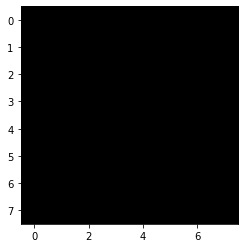

In [ ]:
plt.imshow(Bin, cmap="gray")